<a href="https://colab.research.google.com/github/MauricioTellezNava/neural_style_transfer/blob/main/proyecto_DL_NST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Deep Learning with PyTorch : Neural Style Transfer

## Task 1 : Set Google Colab runtime

![](https://archive.org/download/deep-learning-with-py-torch/Deep%20Learning%20with%20PyTorch.png)

### Instalando torch y torchvision

In [1]:
!pip install torch torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!git clone https://github.com/parth1620/Project-NST.git

Cloning into 'Project-NST'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 19 (delta 2), reused 1 (delta 1), pack-reused 16
Unpacking objects: 100% (19/19), done.


## Task 2 : Loading VGG Pretrained Model

In [3]:
import torch
from torchvision import models

vgg = models.vgg19(pretrained = True)
print(vgg)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [4]:
vgg = vgg.features
print(vgg)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

In [5]:
# No se realizará ningún cálculo del gradiente para los pesos de los modelos en el ciclo de entrenamiento

for parameters in vgg.parameters():
  parameters.requires_grad_(False)

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [7]:
vgg.to(device)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

## Task 3 : Preprocess image

Torchvision models page : https://pytorch.org/docs/stable/torchvision/models.html

In [8]:
from PIL import Image 
from torchvision import transforms as T

def preprocess(img_path, max_size=500):

  image = Image.open(img_path).convert("RGB")

  if max(image.size) > max_size:
    size = max_size

  else:
    size = max(image.size)

  img_transforms = T.Compose([
      
                    T.Resize(size),
                    T.ToTensor(),
                    T.Normalize(mean = [0.485, 0.456, 0.486],
                                std = [0.229, 0.224, 0.225])
  ])
  
  image = img_transforms(image)
  image = image.unsqueeze(0) #(3, 224, 224) | -> (1,3,224,224)

  return image


In [9]:
content_p = preprocess("/content/Project-NST/content11.jpg")
style_p = preprocess("/content/Project-NST/style12.jpg")

content_p = content_p.to(device)
style_p = style_p.to(device)

print("Content Shape", content_p.shape)
print("Style Shape", style_p.shape)

Content Shape torch.Size([1, 3, 259, 345])
Style Shape torch.Size([1, 3, 625, 500])


## Task 4 : Deprocess image

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def deprocess(tensor):
  image = tensor.to("cpu").clone()
  image = image.numpy()
  image = image.squeeze(0)  #(1,3,224,224) -> (3, 224, 224)
  image = image.transpose(1, 2, 0) # (3, 224, 224) -> (224, 224, 3)
  image = image * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.486]) # Son los arrays para std y mean
  image = image.clip(0, 1)

  return image

In [12]:
content_d = deprocess(content_p)
style_d = deprocess(style_p)

print("Deprocess content: ", content_d.shape)
print("Deprocess style: ", style_d.shape)

Deprocess content:  (259, 345, 3)
Deprocess style:  (625, 500, 3)


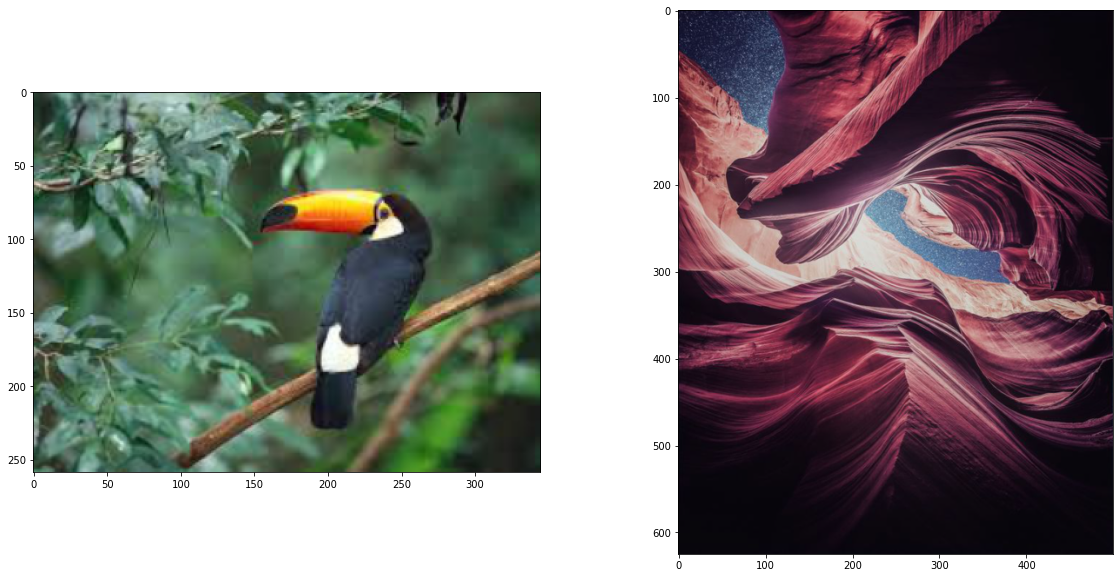

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))
ax1.imshow(content_d)
ax2.imshow(style_d)

## Task 5 : Get content,style features and create gram matrix

In [14]:
def get_features(image, model):
  layers = {
      "0" : "conv1_1",
      "5" : "conv2_1",
      "10" : "conv3_1",
      "21" : "conv4_2",  # content-feature
      "28" : "conv5_1"
  }

  x = image
  Features = {}

  for name, layer in model._modules.items():
    x = layer(x)

    if name in layers:
      Features[layers[name]] = x

  return Features




In [15]:
content_f = get_features(content_p, vgg)
style_f = get_features(style_p, vgg)

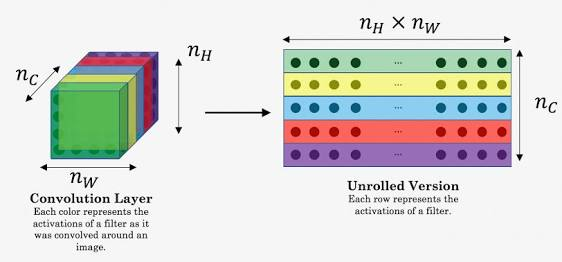

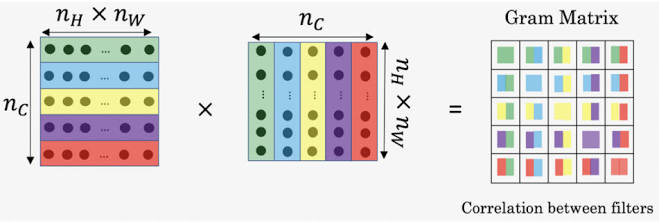

In [16]:
def gram_matrix(tensor):

  b,c,h,w = tensor.size()
  tensor = tensor.view(c,h*w)
  gram = torch.mm(tensor, tensor.t())
  return gram

In [17]:
style_grams = {layer : gram_matrix(style_f[layer]) for layer in style_f}

## Task 6 : Creating Style and Content loss function

In [18]:
def content_loss(target_conv4_2, content_conv4_2):

  loss = torch.mean((target_conv4_2 - content_conv4_2)**2)
  return loss

In [19]:
style_weights = {
    "conv1_1" : 1.0,
    "conv2_1" : 0.75,
    "conv3_1" : 0.2,
    "conv4_2" : 0.2,
    "conv5_1" : 0.2,
}

In [20]:
def style_loss(style_weights, target_features, style_grams):

  loss = 0

  for layer in style_weights:
    target_f = target_features[layer]
    target_gram = gram_matrix(target_f)
    style_gram = style_grams[layer]
    b, c, h, w = target_f.shape
    layer_loss = style_weights[layer] * torch.mean((target_gram - style_gram)**2)
    loss += layer_loss/(c*h*w)
  
  return loss

In [21]:
target = content_p.clone().requires_grad_(True).to(device)
target_f = get_features(target, vgg)
print("Content loss : ", content_loss(target_f["conv4_2"], content_f["conv4_2"]))
print("Style loss : ", style_loss(style_weights, target_f, style_grams))

Content loss :  tensor(0., device='cuda:0', grad_fn=<MeanBackward0>)
Style loss :  tensor(1624.2307, device='cuda:0', grad_fn=<AddBackward0>)


## Task 7 : Training loop

In [22]:
from torch import optim
optimizer = optim.Adam([target], lr = 0.003)

alpha = 1
beta = 1e5

epochs = 3000
show_every = 500

In [23]:
def total_loss(c_loss, s_loss, alpha, beta):
  loss = alpha * c_loss + beta * s_loss
  return loss

In [ ]:
results = []

for i in range(epochs):
  target_f = get_features(target, vgg)
  c_loss = content_loss(target_f["conv4_2"], content_f["conv4_2"])
  s_loss = style_loss(style_weights, target_f, style_grams)
  t_loss = total_loss(c_loss, s_loss, alpha, beta)

  optimizer.zero_grad()
  t_loss.backward()
  optimizer.step()

  if i % show_every == 0:
    print("Total Loss at Epoch {} : {}".format(i, t_loss))
    results.append(deprocess(target.detach()))

Total Loss at Epoch 0 : 162423040.0
Total Loss at Epoch 500 : 29770604.0


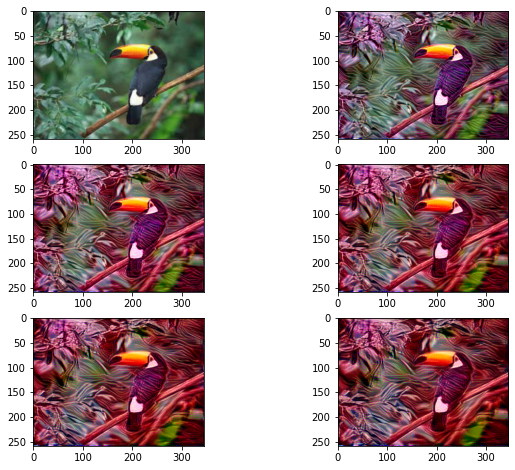

In [25]:
plt.figure(figsize = (10, 8))

for i in range(len(results)):
  plt.subplot(3,2,i+1)
  plt.imshow(results[i])
plt.show()

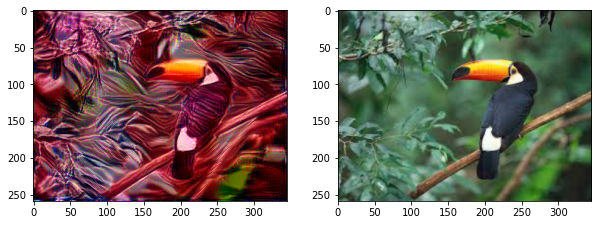

In [26]:
target_copy = deprocess(target.detach())
content_copy = deprocess(content_p)

fig,(ax1,ax2) = plt.subplots(1,2,figsize = (10,5))
ax1.imshow(target_copy)
ax2.imshow(content_copy)